# Pittsburgh Community Assests! 

# Metric:


Our metric was Quality of Life. I will be looking into neighborhoods based on the Community Assests  the offer like (libraries, parks, community centners, Universities, hospitals, etc.). I believe Community Assests are so important for people of all ages. They provide a foundation for local improvement, empowerment, and sustainability by leveraging existing strengths like people's skills, physical places, and organizations We will then narrow it down to the top 5 neighborhood's in Pittsburgh, before finally making our final decsion on what is the best neighboorhood. 


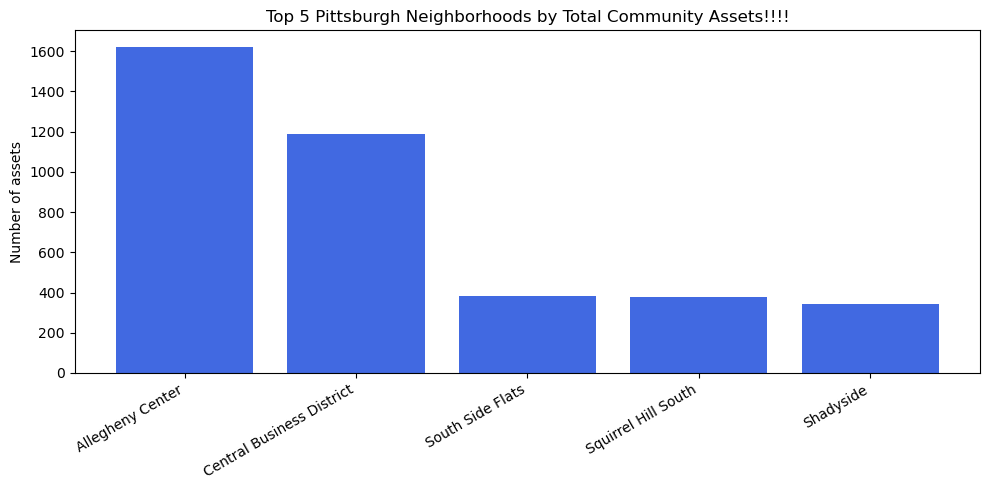

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# This will simply just load our data from the website
assets_url = "https://data.wprdc.org/datastore/dump/5c7825d2-6814-40c7-aefe-3d0f3d6f22e7"
assets = pd.read_csv(assets_url, low_memory=False)

neighborhoods_url = "https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/pittsburghpaneighborhoods-.geojson"
neighborhoods = gpd.read_file(neighborhoods_url)

# This will clean all the Unnesssary data and minimize it.
assets = assets.dropna(subset=["latitude", "longitude"])
assets = assets[assets["city"].str.contains("Pittsburgh", case=False, na=False)]

assets_gdf = gpd.GeoDataFrame(
    assets,
    geometry=gpd.points_from_xy(assets.longitude, assets.latitude),
    crs="EPSG:4326"
)

joined = gpd.sjoin(assets_gdf, neighborhoods, how="inner", predicate="within")

# this will determine neighborhood column
hood_col = "hood" if "hood" in joined.columns else "name"

# This will take all the counts of assests for the neighborhood
possible_cols = ["type", "asset_type", "Type", "category"]
asset_col = next((c for c in possible_cols if c in joined.columns), None)
# simple if else statement to see it
if asset_col:
    neigh_counts = joined.groupby(hood_col)[asset_col].count().reset_index(name="Total Assets")
else:
    neigh_counts = joined.groupby(hood_col).size().reset_index(name="Total Assets")

# These are the top 5 neighborhoods it came up with
top5 = neigh_counts.sort_values("Total Assets", ascending=False).head(5)

# Bar chart to show it
plt.figure(figsize=(10,5))
plt.bar(top5[hood_col], top5["Total Assets"], color="royalblue")
plt.title("Top 5 Pittsburgh Neighborhoods by Total Community Assets!!!!")
plt.ylabel("Number of assets")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()





# Conclusion:
As we can see Allegheny Center seems to have the most Assests for Neighborhoods in Pittsburgh. Shadyside and Squirrel Hill South are also pretty close contenders to be consdiered the all around best Neighborhood!